![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [1]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("./data/penguins.csv")
print(penguins_df.shape)
penguins_df.head()

(332, 5)


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [2]:
# any missing values? nope
penguins_df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## Should we filter by sex?

I'm not a biologist, but it seems intuitive to check whether the sex of a penguin confounds the ability to cluster them by species using physical measurements like the ones provided in the dataset. This section will do a simple check by comparing how well K-means does at clustering male, female and both male and female penguines together.



In [3]:
penguins_df.columns  # 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex'
numeric_columns = penguins_df.columns[:4]
# create the data partitions so compare against
df_males = penguins_df.loc[penguins_df['sex'] == 'MALE', numeric_columns]
df_females = penguins_df.loc[penguins_df['sex'] == 'FEMALE', numeric_columns]
df_both = penguins_df.loc[:, numeric_columns]
print(f"Male sample count: {df_males.shape[0]}, Female sample count: {df_females.shape[0]}")  # 167 vs 165 pretty balanced
print(f"Sample count of entire dataset: {df_both.shape[0]}")

Male sample count: 167, Female sample count: 165
Sample count of entire dataset: 332


In [4]:
male_numerics = df_males.loc[:, numeric_columns].values
female_numerics = df_females.loc[:, numeric_columns].values
both_numerics = df_both.loc[:, numeric_columns].values

In [5]:
df_females.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
5,38.9,17.8,181.0,3625.0
7,41.1,17.6,182.0,3200.0


## Try Visualizing Clusters

+ Try `learning_rate` values 50, 100, 150 and 200

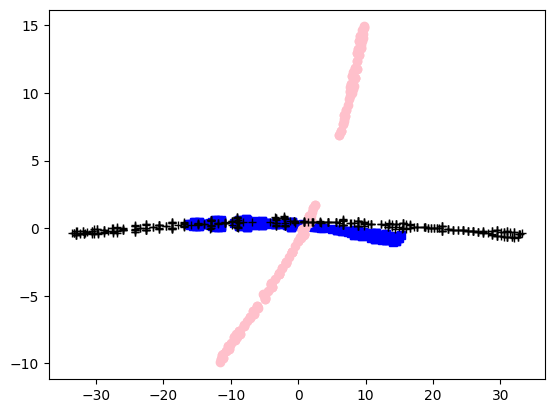

In [6]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(learning_rate=50)
transformed_male = model.fit_transform(male_numerics)
transformed_female = model.fit_transform(female_numerics)
transformed_both = model.fit_transform(both_numerics)

fig, ax = plt.subplots()

x_male = transformed_male[:, 0]
y_male = transformed_male[:, 1]

x_female = transformed_female[:, 0]
y_female = transformed_female[:, 1]

x_both = transformed_both[:, 0]
y_both = transformed_both[:, 1]

ax.plot(x_male, y_male, marker='s', color='blue', linestyle="None")
ax.plot(x_female, y_female, marker='o', color='pink', linestyle="None")
ax.plot(x_both, y_both, marker='+', color='black', linestyle="None")

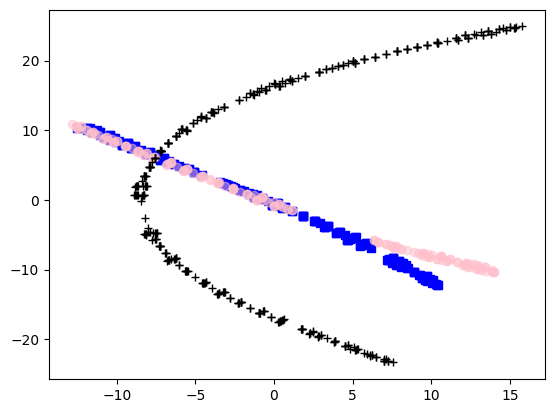

In [7]:
model = TSNE(learning_rate=100)
transformed_male = model.fit_transform(male_numerics)
transformed_female = model.fit_transform(female_numerics)
transformed_both = model.fit_transform(both_numerics)

fig, ax = plt.subplots()

x_male = transformed_male[:, 0]
y_male = transformed_male[:, 1]

x_female = transformed_female[:, 0]
y_female = transformed_female[:, 1]

x_both = transformed_both[:, 0]
y_both = transformed_both[:, 1]

ax.plot(x_male, y_male, marker='s', color='blue', linestyle="None")
ax.plot(x_female, y_female, marker='o', color='pink', alpha=0.5, linestyle="None")
ax.plot(x_both, y_both, marker='+', color='black', linestyle="None")

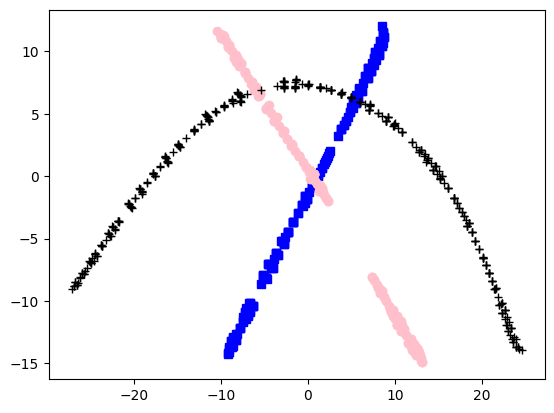

In [8]:
model = TSNE(learning_rate=150)
transformed_male = model.fit_transform(male_numerics)
transformed_female = model.fit_transform(female_numerics)
transformed_both = model.fit_transform(both_numerics)

fig, ax = plt.subplots()

x_male = transformed_male[:, 0]
y_male = transformed_male[:, 1]

x_female = transformed_female[:, 0]
y_female = transformed_female[:, 1]

x_both = transformed_both[:, 0]
y_both = transformed_both[:, 1]

ax.plot(x_male, y_male, marker='s', color='blue', linestyle="None")
ax.plot(x_female, y_female, marker='o', color='pink', linestyle="None")
ax.plot(x_both, y_both, marker='+', color='black', linestyle="None")

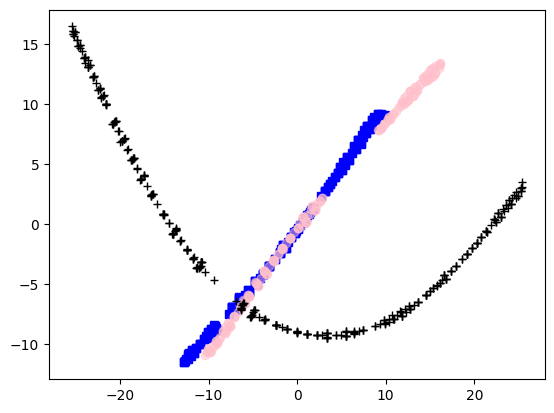

In [9]:
model = TSNE(learning_rate=200)
transformed_male = model.fit_transform(male_numerics)
transformed_female = model.fit_transform(female_numerics)
transformed_both = model.fit_transform(both_numerics)

fig, ax = plt.subplots()

x_male = transformed_male[:, 0]
y_male = transformed_male[:, 1]

x_female = transformed_female[:, 0]
y_female = transformed_female[:, 1]

x_both = transformed_both[:, 0]
y_both = transformed_both[:, 1]

ax.plot(x_male, y_male, marker='s', color='blue', linestyle="None")
ax.plot(x_female, y_female, marker='o', color='pink', alpha=0.5, linestyle="None")
ax.plot(x_both, y_both, marker='+', color='black', linestyle="None")

The breaks in the lines above suggest the boundaries of three clusters. However, these boundaries change somewhat with learning rate.

## Scaling the features

Features with large differences in variance will make clustering more difficult. The common way to mitigate differences in variance is to scale the features. To see the difference that scaling makes, K-Means clustering will be applied both before and after scaling and the results will be compared.

## Non-Scaled Male & Female Penguins

Main observation is that clustering the data without scaling for each sex: male and female separately, shows a large drop in inertia from 1 to 2 clusters and a modest drop from 2 to 3 clusters.

The "elbow" of the inertia vs clusters curves for male, female and all penguins is going from 2 to 3 clusters which is what we'd see if we expected that there are 3 species.

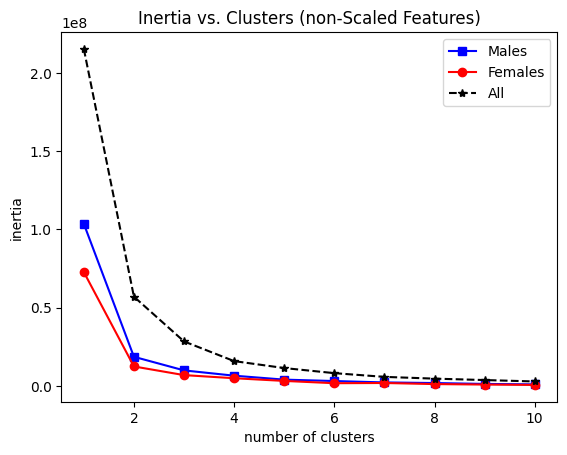

In [10]:
inertia_males = []
inertia_females = []
inertia_both = []
clusters = list(range(1, 11))

for i in clusters:
    model_no_scaling_males = KMeans(n_clusters=i)
    model_no_scaling_males.fit(male_numerics)
    inertia_males.append(model_no_scaling_males.inertia_)
    # print(f"For MALE penguins with {i} cluster(s), inertia = {model_no_scaling_males.inertia_}")

for j in clusters:
    model_no_scaling_females = KMeans(n_clusters=j)
    model_no_scaling_females.fit(female_numerics)
    inertia_females.append(model_no_scaling_females.inertia_)
    # print(f"For FEMALE penguins with {i} cluster(s), inertia = {model_no_scaling_females.inertia_}")

for k in clusters:
    model_no_scaling_both = KMeans(n_clusters=k)
    model_no_scaling_both.fit(both_numerics)
    inertia_both.append(model_no_scaling_both.inertia_)

fig, ax = plt.subplots()

ax.plot(clusters, inertia_males, marker='s', c='blue', label='Males')
ax.plot(clusters, inertia_females, marker='o', c='red', label='Females')
ax.plot(clusters, inertia_both, marker='*', c='black', linestyle='--', label='All')
ax.set_xlabel("number of clusters")
ax.set_ylabel("inertia")
ax.set_title("Inertia vs. Clusters (non-Scaled Features)")
ax.legend()
plt.show()

## Which features best separate the samples?

Since we only have 4 features, looking at each combination two predictors doesn't require a lot of work. So we'll look at:

+ culmen_length_mm vs culmen_depth_mm
+ culmen_length_mm vs flipper_length_mm
+ culmen_length_mm vs body_mass_g
+ culmen_depth_mm vs flipper_length_mm
+ culmen_depth_mm vs body_mass_g
+ flipper_length_mm vs body_mass_g

In [11]:
model_k3_both_nc = KMeans(n_clusters=3)
model_k3_both_nc.fit(both_numerics)

pred_labels = model_k3_both_nc.predict(both_numerics)
df_both['pred_label'] = pred_labels
print(f"cluster labels: {df_both['pred_label'].unique()}")
df_both.head(10)

cluster labels: [1 0 2]


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,pred_label
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
3,36.7,19.3,193.0,3450.0,1
4,39.3,20.6,190.0,3650.0,1
5,38.9,17.8,181.0,3625.0,1
6,39.2,19.6,195.0,4675.0,0
7,41.1,17.6,182.0,3200.0,1
8,38.6,21.2,191.0,3800.0,1
9,36.6,17.8,185.0,3700.0,1


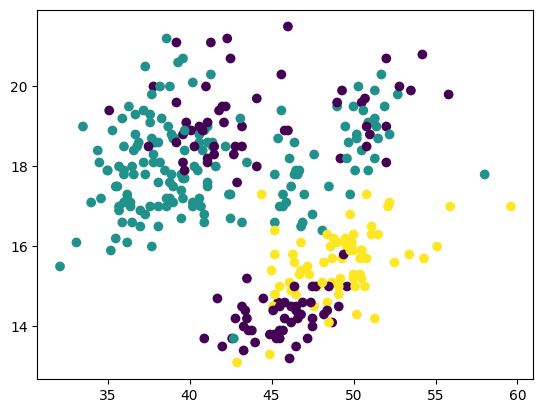

In [12]:
# culmen_length_mm vs culmen_depth_mm
fig, ax = plt.subplots()
ax.scatter(df_both['culmen_length_mm'], df_both['culmen_depth_mm'], c=df_both['pred_label'])

plt.show()

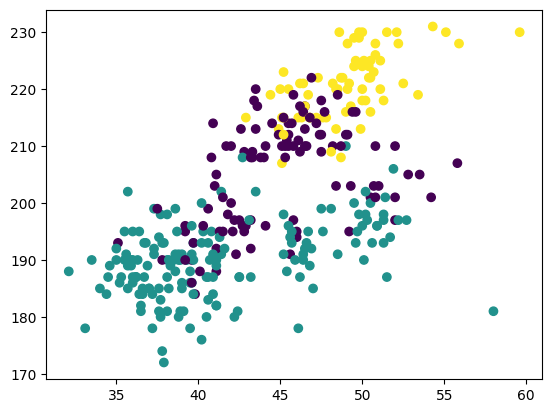

In [13]:
# culmen_length_mm vs flipper_length_mm
fig, ax = plt.subplots()
ax.scatter(df_both['culmen_length_mm'], df_both['flipper_length_mm'], c=df_both['pred_label'])

plt.show()

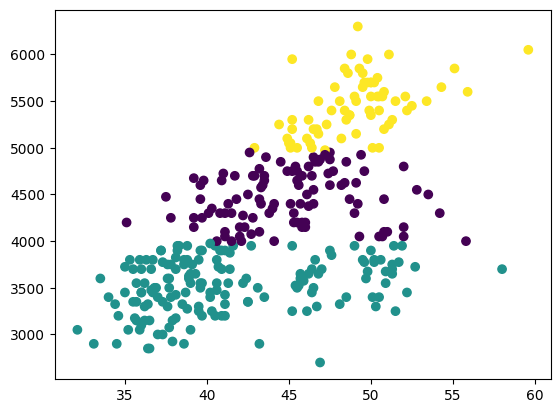

In [14]:
# culmen_length_mm vs body_mass_g - best separation so far!
fig, ax = plt.subplots()
ax.scatter(df_both['culmen_length_mm'], df_both['body_mass_g'], c=df_both['pred_label'])

plt.show()

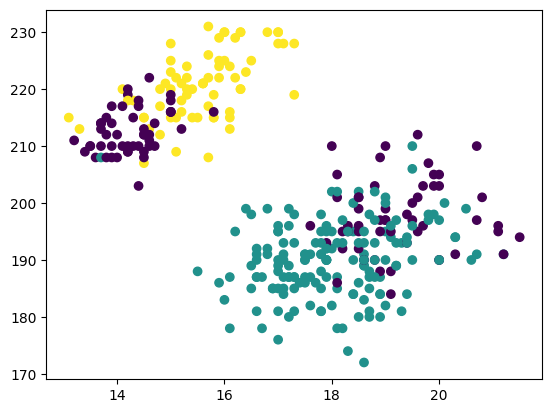

In [15]:
# culmen_depth_mm vs flipper_length_mm
fig, ax = plt.subplots()
ax.scatter(df_both['culmen_depth_mm'], df_both['flipper_length_mm'], c=df_both['pred_label'])

plt.show()

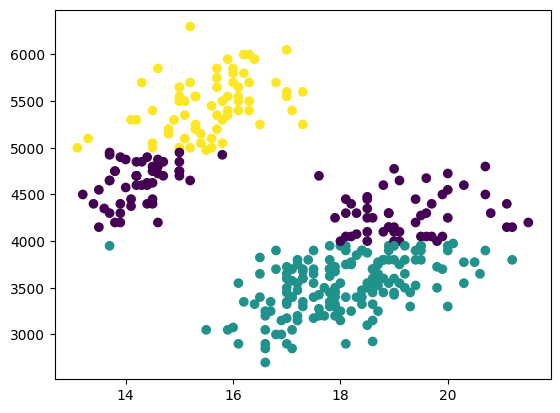

In [16]:
# culmen_depth_mm vs body_mass_g
fig, ax = plt.subplots()
ax.scatter(df_both['culmen_depth_mm'], df_both['body_mass_g'], c=df_both['pred_label'])

plt.show()

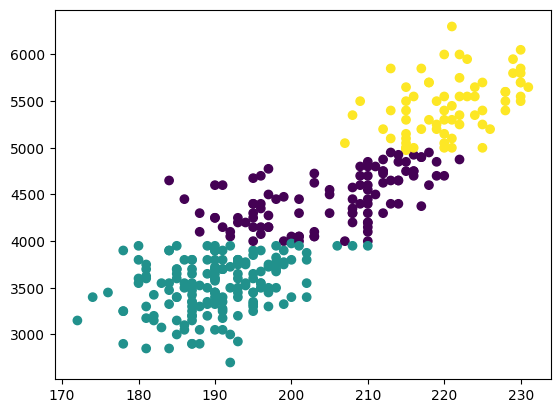

In [17]:
# flipper_length_mm vs body_mass_g - pretty good as well!
fig, ax = plt.subplots()
ax.scatter(df_both['flipper_length_mm'], df_both['body_mass_g'], c=df_both['pred_label'])

plt.show()

### Scaled Penguins

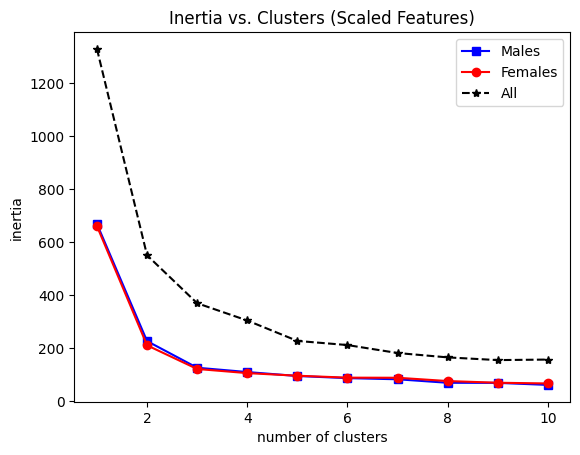

In [18]:
scaler_male = StandardScaler()
scaler_female = StandardScaler()
scaler_both = StandardScaler()

scaler_male.fit(male_numerics)
scaler_female.fit(female_numerics)
scaler_both.fit(both_numerics)

StandardScaler(copy=True, with_mean=True, with_std=True)

male_scaled = scaler_male.transform(male_numerics)
female_scaled = scaler_female.transform(female_numerics)
both_scaled = scaler_both.transform(both_numerics)

inertia_males_scaled = []
inertia_females_scaled = []
inertia_both_scaled = []

# fit K-Means to scaled features
for i in clusters:
    model_scaled_males = KMeans(n_clusters=i)
    model_scaled_males.fit(male_scaled)
    inertia_males_scaled.append(model_scaled_males.inertia_)

for j in clusters:
    model_scaled_females = KMeans(n_clusters=j)
    model_scaled_females.fit(female_scaled)
    inertia_females_scaled.append(model_scaled_females.inertia_)

for k in clusters:
    model_scaled_both = KMeans(n_clusters=k)
    model_scaled_both.fit(both_scaled)
    inertia_both_scaled.append(model_scaled_both.inertia_)

fig, ax = plt.subplots()

ax.plot(clusters, inertia_males_scaled, marker='s', c='blue', label='Males')
ax.plot(clusters, inertia_females_scaled, marker='o', c='red', label='Females')
ax.plot(clusters, inertia_both_scaled, marker='*', c='black', linestyle='--', label='All')
ax.set_xlabel("number of clusters")
ax.set_ylabel("inertia")
ax.set_title("Inertia vs. Clusters (Scaled Features)")
ax.legend()
plt.show()


### Separating Sex Improves Clustering

When we treat each penguin sex separately, clustering improves. This makes sense because we expect there to be differences between males and females within each species.

### Checking final predictions

Since we get tighter clusers (lower inertia) when we run K-Means on males and females separately, we need to check that these labels assignments line up with assignments done when K-Means is run on the overall combined dataset. We'll start with the combined data set.

In [19]:
# add columns for scaled features combined
scaler_both = StandardScaler()
# scaler_both.fit(df_both[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].values)
scaler_both.fit(df_both[numeric_columns].values)
# scaled_both_samples = scaler_both.transform(df_both[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].values)
scaled_both_samples = scaler_both.transform(df_both[numeric_columns].values)
df_both['culmen_length_scaled'] = scaled_both_samples[:, 0]
df_both['culmen_depth_scaled'] = scaled_both_samples[:, 1]
df_both['flipper_length_scaled'] = scaled_both_samples[:, 2]
df_both['body_mass_g_scaled'] = scaled_both_samples[:, 3]

In [20]:
# generate cluster labels
kmeans = KMeans(n_clusters=3)
labels_both = kmeans.fit_predict(df_both[numeric_columns].values)
df_both['cluster_label'] = labels_both
# how do the labels distribute?
print(df_both['cluster_label'].value_counts())
df_both.head()

cluster_label
1    166
0    105
2     61
Name: count, dtype: int64


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,pred_label,culmen_length_scaled,culmen_depth_scaled,flipper_length_scaled,body_mass_g_scaled,cluster_label
0,39.1,18.7,181.0,3750.0,1,-0.903906,0.790360,-1.425342,-0.566948,1
1,39.5,17.4,186.0,3800.0,1,-0.830434,0.126187,-1.068577,-0.504847,1
2,40.3,18.0,195.0,3250.0,1,-0.683490,0.432728,-0.426399,-1.187953,1
3,36.7,19.3,193.0,3450.0,1,-1.344738,1.096901,-0.569105,-0.939551,1
4,39.3,20.6,190.0,3650.0,1,-0.867170,1.761074,-0.783164,-0.691149,1


In [21]:
cluster_centers_both = kmeans.cluster_centers_
print(type(cluster_centers_both))
print(cluster_centers_both)

<class 'numpy.ndarray'>
[[  45.10571429   16.58857143  205.93333333 4513.33333333]
 [  41.39277108   18.0626506   190.45783133 3536.44578313]
 [  49.30655738   15.64918033  221.06557377 5501.63934426]]


In [22]:
stat_penguins = pd.DataFrame(cluster_centers_both)
stat_penguins.columns = numeric_columns
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,45.105714,16.588571,205.933333,4513.333333
1,41.392771,18.062651,190.457831,3536.445783
2,49.306557,15.649180,221.065574,5501.639344


### Now cluster each sex separately

In [23]:
# add columns for scaled male features
scaler_males = StandardScaler()
scaler_males.fit(df_males[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].values)
scaled_male_samples = scaler_males.transform(df_males[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].values)
df_males['culmen_length_scaled'] = scaled_male_samples[:, 0]
df_males['culmen_depth_scaled'] = scaled_male_samples[:, 1]
df_males['flipper_length_scaled'] = scaled_male_samples[:, 2]
df_males['body_mass_g_scaled'] = scaled_male_samples[:, 3]
# generate cluster labels
kmeans = KMeans(n_clusters=3)
labels_male = kmeans.fit_predict(df_males[numeric_columns].values)
df_males['cluster_label'] = labels_male
df_males.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,culmen_length_scaled,culmen_depth_scaled,flipper_length_scaled,body_mass_g_scaled,cluster_label
0,39.1,18.7,181.0,3750.0,-1.288334,0.448462,-1.619419,-1.011440,1
4,39.3,20.6,190.0,3650.0,-1.250565,1.477363,-1.000399,-1.138416,1
6,39.2,19.6,195.0,4675.0,-1.269450,0.935836,-0.656499,0.163092,0
8,38.6,21.2,191.0,3800.0,-1.382757,1.802279,-0.931619,-0.947951,1
11,42.5,20.7,197.0,4500.0,-0.646259,1.531515,-0.518939,-0.059116,0


In [24]:
# add columns for scaled female features
scaler_females = StandardScaler()
scaler_females.fit(df_females[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].values)
scaled_female_samples = scaler_females.transform(df_females[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].values)
df_females['culmen_length_scaled'] = scaled_female_samples[:, 0]
df_females['culmen_depth_scaled'] = scaled_female_samples[:, 1]
df_females['flipper_length_scaled'] = scaled_female_samples[:, 2]
df_females['body_mass_g_scaled'] = scaled_female_samples[:, 3]
# generate cluster labels
kmeans = KMeans(n_clusters=3)
labels_female = kmeans.fit_predict(df_females[numeric_columns].values)
df_females['cluster_label'] = labels_female
df_females.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,culmen_length_scaled,culmen_depth_scaled,flipper_length_scaled,body_mass_g_scaled,cluster_label
1,39.5,17.4,186.0,3800.0,-0.531230,0.544368,-0.911802,-0.093763,2
2,40.3,18.0,195.0,3250.0,-0.367584,0.879521,-0.189655,-0.921889,0
3,36.7,19.3,193.0,3450.0,-1.103992,1.605684,-0.350132,-0.620752,0
5,38.9,17.8,181.0,3625.0,-0.653965,0.767803,-1.312994,-0.357258,2
7,41.1,17.6,182.0,3200.0,-0.203938,0.656086,-1.232756,-0.997173,0


In [25]:
df_both_sex_labeled = pd.concat([df_males, df_females]).sort_index()
print(df_both_sex_labeled['cluster_label'].value_counts())
df_both_sex_labeled.head()

cluster_label
1    130
2    105
0     97
Name: count, dtype: int64


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,culmen_length_scaled,culmen_depth_scaled,flipper_length_scaled,body_mass_g_scaled,cluster_label
0,39.1,18.7,181.0,3750.0,-1.288334,0.448462,-1.619419,-1.011440,1
1,39.5,17.4,186.0,3800.0,-0.531230,0.544368,-0.911802,-0.093763,2
2,40.3,18.0,195.0,3250.0,-0.367584,0.879521,-0.189655,-0.921889,0
3,36.7,19.3,193.0,3450.0,-1.103992,1.605684,-0.350132,-0.620752,0
4,39.3,20.6,190.0,3650.0,-1.250565,1.477363,-1.000399,-1.138416,1


### Notice how the cluster distributions are a little different

Given how much tighter our clusters are when the sexes are separated, I would put more weight on the results of the last couple of cells compuared to the clustering done on the initial combined data.